In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

Import EF2020 dataset and explore.

In [41]:
uni20_df = pd.read_csv("ef2020cp.csv")

In [42]:
uni20_df.head()

,UNITID,EFCIPLEV,CIPCODE,LINE,SECTION,LSTUDY,XEFTOTLT,EFTOTLT,XEFTOTLM,EFTOTLM,...,XEFUNKNM,EFUNKNM,XEFUNKNW,EFUNKNW,XEFNRALT,EFNRALT,XEFNRALM,EFNRALM,XEFNRALW,EFNRALW
0,100654,101,13.0,29,3,1,R,331,R,70,...,R,7,R,27,R,0,R,0,R,0
1,100654,102,13.0,99,3,2,R,278,R,57,...,R,3,R,15,R,0,R,0,R,0
2,100654,103,13.0,99,3,3,R,278,R,57,...,R,3,R,15,R,0,R,0,R,0
3,100654,104,13.0,99,3,4,R,88,R,17,...,R,1,R,3,R,0,R,0,R,0
4,100654,105,13.0,99,3,5,R,190,R,40,...,R,2,R,12,R,0,R,0,R,0


Create a new dataframe, keeping only the columns needed for analysis:
 - UNITID: university ID code
 - CIPCODE: code denoting category of study
 - EFTOTL: total students enrolled
 - EFTOTLM: total male students enrolled
 - EFTOTLW: total female students enrolled
 - EFCIPLEV: 202: Engineering Undergraduate

In [43]:
uni20_df1 = uni20_df[['UNITID', 'EFCIPLEV', 'EFTOTLT', 'EFTOTLM', 'EFTOTLW']]

In [44]:
uni20_df1.head()

,UNITID,EFCIPLEV,EFTOTLT,EFTOTLM,EFTOTLW
0,100654,101,331,70,261
1,100654,102,278,57,221
2,100654,103,278,57,221
3,100654,104,88,17,71
4,100654,105,190,40,150


Look at totals for each CIPCODE (area of study)

In [45]:
uni20_df.groupby('CIPCODE')['EFTOTLW'].sum()

CIPCODE
13.0000    5055522
14.0000    1584014
22.0101     128554
26.0000    4313412
27.0000     450332
40.0000     697370
51.0401      27630
51.1201      93790
52.0000    8799548
Name: EFTOTLW, dtype: int64

Create a new dataframe with only EFCIPLEV 202 which is ENGINEERING Undergrad

In [46]:
uni20_df2 = uni20_df1.loc[uni20_df1["EFCIPLEV"].isin([202])]

In [47]:
uni20_df2

,UNITID,EFCIPLEV,EFTOTLT,EFTOTLM,EFTOTLW
25,100654,202,578,434,144
164,100663,202,558,382,176
326,100706,202,2792,2203,589
468,100724,202,60,28,32
602,100751,202,4383,3405,978
...,...,...,...,...,...
162599,486840,202,4400,3761,639
162741,486901,202,90,75,15
163403,490805,202,562,476,86
163700,492962,202,356,291,65


Now the EFCIPLEV column can be dropped. I created a new dataframe with only the columns needed

In [48]:
uni20_df3 = uni20_df2[['UNITID','EFTOTLT', 'EFTOTLM', 'EFTOTLW']]
uni20_df3

,UNITID,EFTOTLT,EFTOTLM,EFTOTLW
25,100654,578,434,144
164,100663,558,382,176
326,100706,2792,2203,589
468,100724,60,28,32
602,100751,4383,3405,978
...,...,...,...,...
162599,486840,4400,3761,639
162741,486901,90,75,15
163403,490805,562,476,86
163700,492962,356,291,65


In [49]:
uni20_df5 = uni20_df3.reset_index(drop=True)
uni20_df5

,UNITID,EFTOTLT,EFTOTLM,EFTOTLW
0,100654,578,434,144
1,100663,558,382,176
2,100706,2792,2203,589
3,100724,60,28,32
4,100751,4383,3405,978
...,...,...,...,...
770,486840,4400,3761,639
771,486901,90,75,15
772,490805,562,476,86
773,492962,356,291,65


Add a new column with the ratio of women to men for each university.

In [50]:
uni20_df5['W/M_Ratio'] = uni20_df5['EFTOTLW']/uni20_df5['EFTOTLM']
uni20_df5

,UNITID,EFTOTLT,EFTOTLM,EFTOTLW,W/M_Ratio
0,100654,578,434,144,0.331797
1,100663,558,382,176,0.460733
2,100706,2792,2203,589,0.267363
3,100724,60,28,32,1.142857
4,100751,4383,3405,978,0.287225
...,...,...,...,...,...
770,486840,4400,3761,639,0.169902
771,486901,90,75,15,0.200000
772,490805,562,476,86,0.180672
773,492962,356,291,65,0.223368


# Bring in University Location Data

In [51]:
UniLoc = pd.read_csv("UniversityID_Lat_Long_ONLY.csv")

In [36]:
UniLoc

,UNITID,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE
0,100654,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345
2,100690,Amridge University,Montgomery,AL,36117-3553,32.362609,-86.174010
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449
4,100724,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677
...,...,...,...,...,...,...,...
6689,48511113,Georgia Military College - Eastman,Eastman,GA,310236109,NaN,NaN
6690,48616901,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN
6691,49005401,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,NaN,NaN
6692,49146401,ABC Adult School - Cabrillo Lane,Cerritos,CA,907037748,NaN,NaN


JOIN!
Use the merge function to merge the location dataframe with the enrollment information dataframe.

In [52]:
df2020 = pd.merge(uni20_df5, UniLoc, on = "UNITID")
df2020

,UNITID,EFTOTLT,EFTOTLM,EFTOTLW,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE
0,100654,578,434,144,0.331797,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502
1,100663,558,382,176,0.460733,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345
2,100706,2792,2203,589,0.267363,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449
3,100724,60,28,32,1.142857,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677
4,100751,4383,3405,978,0.287225,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978
...,...,...,...,...,...,...,...,...,...,...,...
769,485768,2,2,0,0.000000,Atlantis University,Miami,FL,33132,25.788978,-80.189420
770,486840,4400,3761,639,0.169902,Kennesaw State University,Kennesaw,GA,30144,34.038807,-84.583052
771,486901,90,75,15,0.200000,Milligan University,Milligan,TN,37682,36.300147,-82.294070
772,490805,562,476,86,0.180672,Purdue University Northwest,Hammond,IN,46323,41.584324,-87.474236


Create a GEO Dataframe from the newly merged dataset - this adds a geometry column with point data.

In [53]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df2020["LONGITUDE"], df2020["LATITUDE"])]
geometry[:3]
geo_df2020 = gpd.GeoDataFrame(df2020, crs = crs, geometry = geometry)
geo_df2020.head()

C:\tools\Anaconda3\envs\GeoSpacial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,UNITID,EFTOTLT,EFTOTLM,EFTOTLW,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,geometry
0,100654,578,434,144,0.331797,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,POINT (-86.56850 34.78337)
1,100663,558,382,176,0.460733,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.79935 33.50570)
2,100706,2792,2203,589,0.267363,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.64045 34.72456)
3,100724,60,28,32,1.142857,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,POINT (-86.29568 32.36432)
4,100751,4383,3405,978,0.287225,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54598 33.21187)


In [55]:
geo_df2020.to_csv('geo_df2020.csv', index = False) #export dataset

Import USA GeoData file using geopandas
For ease, set the index to the state abbreviation.
Drop Alaksa, Hawaii and Puerto Rico for continguous states.
Plot the figure.

<AxesSubplot:>

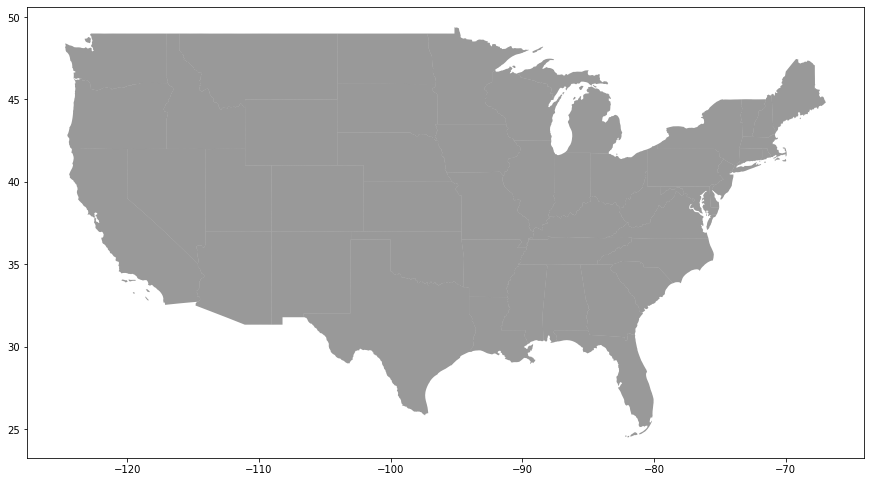

In [18]:
file = "cb_2017_us_state_20m"
USA_gdf = gpd.read_file(file)
USA_gdf = USA_gdf.set_index("STUSPS")
USA_gdf1 = USA_gdf.drop(['AK', 'HI', 'PR'])

fig, ax = plt.subplots(figsize=(15, 15))
USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")

Add the geo points for each university in another layer on the figure.

<AxesSubplot:>

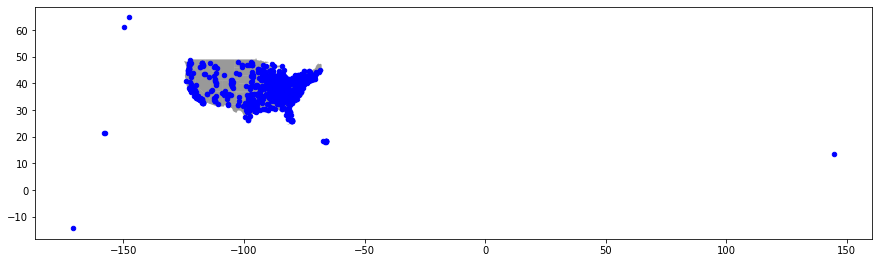

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")
geo_df2020.plot(ax=ax, markersize = 20, color = "blue")

OOPS! Looks like there are some universities outside of the contiguous US. After some exploration in excel I created a list of the indicies of the offending universities. Now I can drop them and continue.

In [20]:
geo_df2020_1 = geo_df2020.drop(index=[12, 13, 163, 164, 746, 747, 748, 749, 750, 751, 752, 753, 757, 794])

<AxesSubplot:>

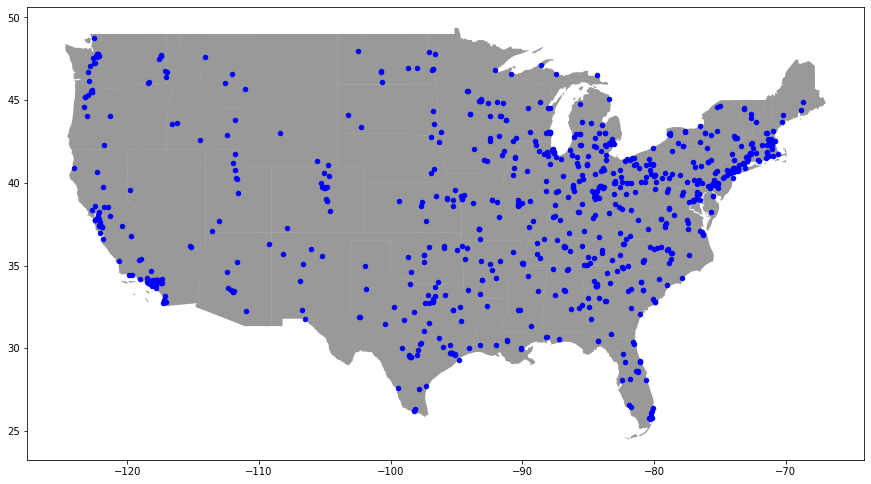

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")
geo_df2020_1.plot(ax=ax, markersize = 20, color = "blue")

That looks better! This shows all universities in the dataset which have an engineering major.

Play with the map
# Import Folium

In [22]:
import folium
import folium.plugins
import branca.colormap as cm

In [23]:
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):    
     folium.Circle(        
          location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
          radius=10,    
     ).add_to(map)
map

In order to show the information on the ratio of women to me I'm going to play with color maps linked to the w/m ratio information.

In [24]:
colormap = cm.LinearColormap(colors = ["MediumBlue", "Magenta"], index=None, vmin=0.0, vmax=1.0)
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):    
     folium.Circle(        
        location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
        radius=100, 
        fill=True,
        color=colormap(geo_df2020.iloc[i]['W/M_Ratio']),
        fill_opacity=0.5
    ).add_to(map)
map.add_child(colormap)

Lets try a  heat map